In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('../Dataset/all_var_int.csv')
df.describe()

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_36109/1022285469.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/all_var_int.csv')


,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,jobcard_applied_ratio,total_reg_workers_ratio,women_reg_workers_ratio,joint_acc_of_women_ratio,num_women_beneficiary_worker_with_acc_ratio,active_women_beneficiary_worker_with_acc_ratio,pmuy_ratio,shg_loan_per_shg,loan_per_shg,ratio_women_reg_workers_with_joint_acc
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5.815000e+03,5815.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,0.734578,0.291178,0.487967,0.065415,0.814762,0.678983,0.247614,2.393990e+04,2.393990e+04,0.125774
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,0.393734,0.212106,0.112527,0.138342,0.167105,0.169635,0.132712,3.742710e+04,3.742710e+04,0.348387
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,0.517667,0.139715,0.434812,0.003759,0.740155,0.584582,0.148857,4.916442e+03,4.916442e+03,0.009136
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,0.705664,0.250255,0.480934,0.016412,0.865589,0.694471,0.239051,1.410389e+04,1.410389e+04,0.037012
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,0.886966,0.379779,0.518270,0.062226,0.936591,0.801318,0.335610,3.248097e+04,3.248097e+04,0.119173
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,11.910448,3.654485,0.941742,2.311789,1.000000,1.000000,0.847415,1.705000e+06,1.705000e+06,18.176471


In [2]:
df.isna().sum()

FID_Key                                           0
state_code                                        0
state_name                                        0
district_code                                     0
district_name                                     0
                                                 ..
active_women_beneficiary_worker_with_acc_ratio    0
pmuy_ratio                                        0
shg_loan_per_shg                                  0
loan_per_shg                                      0
ratio_women_reg_workers_with_joint_acc            0
Length: 159, dtype: int64

In [3]:
all_col = list(df.columns)
print(all_col)

['FID_Key', 'state_code', 'state_name', 'district_code', 'district_name', 'block_code', 'block_name', 'objectid', 'stcode11', 'dtcode11', 'blkcode11', 'drought_frq', 'storm_freq', 'flood_freq', 'rural_pop', 'geog_area', 'crp_sq_km', 'aridity', 'fcover_sq_km', 'rugged', 'landslide_f', 'avg_trvl_1', 'avg_trvl_2', 'avg_trvl_3', 'avg_trvl_4', 'avg_trvl_5', 'avg_trvl_6', 'avg_trvl_7', 'avg_trvl_8', 'avg_trvl_9', 'bc_cnt', 'branch_cnt', 'bcrural', 'branch_rur', 'floss_total', 'bdod', 'cec', 'cfvo', 'clay', 'elev_mean', 'ocd', 'ocs', 'phh_20', 'soc', 'sand', 'silt', 'air_pollutn', 'cdi_value', 'lpa_total_rainfall', 'coef_variation', 'rainfall_2020', 'forest_gain_total', 'vld_rural', 'ld_rural', 'rural', 's_urban', 'sd_urban', 'd_urban', 'urban', 'date_mons', 'cum_flood', 'cnt_flood_yr', 'lpa_tmin_90th_temp', 'lpa_tmax_90th_temp', 'avg_tmin_annual', 'avg_tmax_annual', 'total_rad', 'cisi', 'total_population', 'total_households', 'hh_non_farm_activities', 'total_shgs', 'total_shgs_accessed_bank_

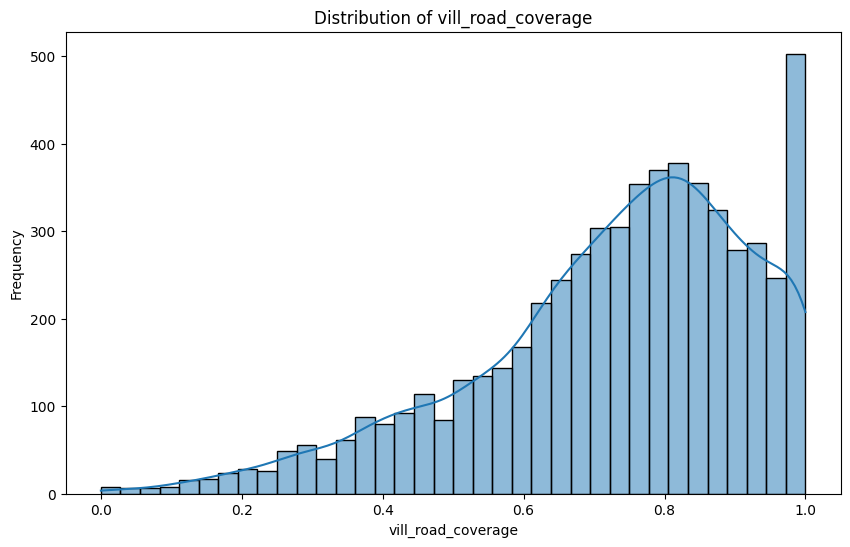

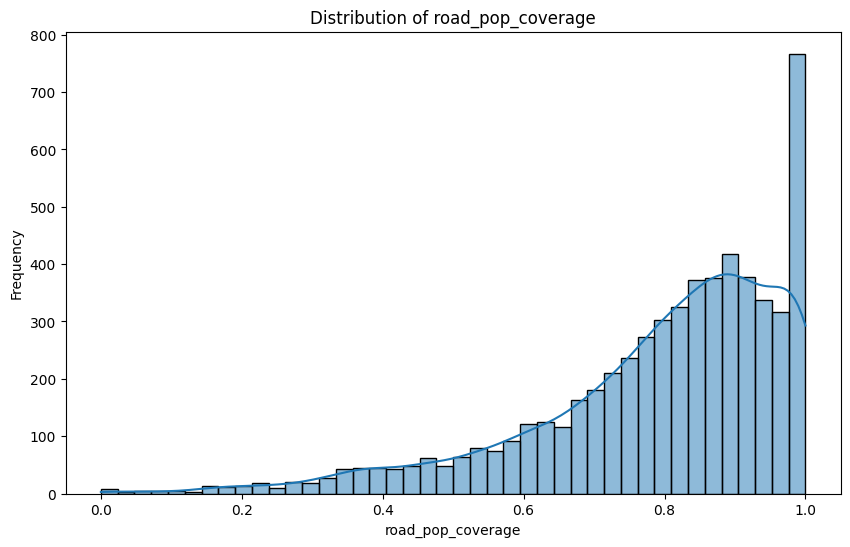

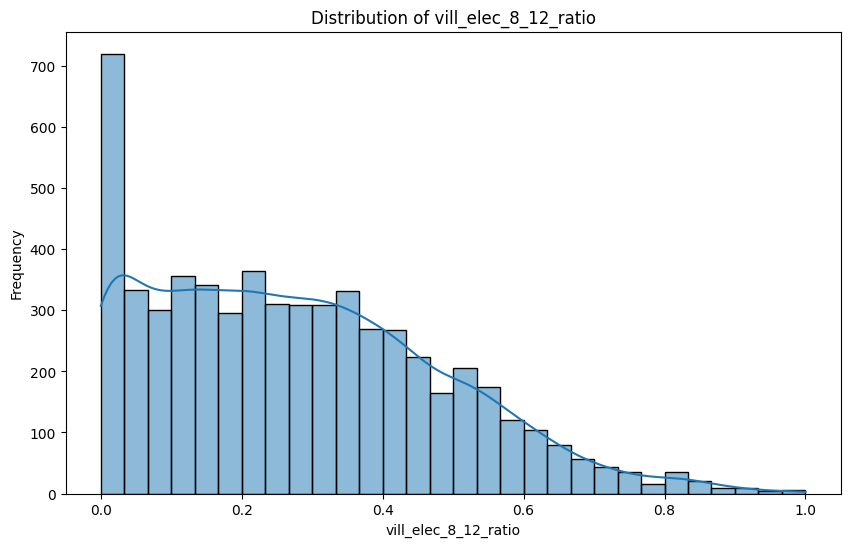

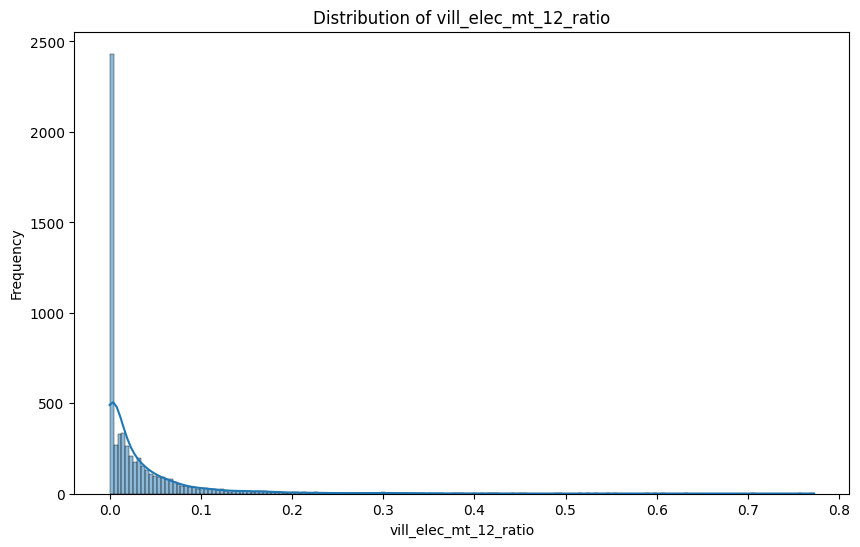

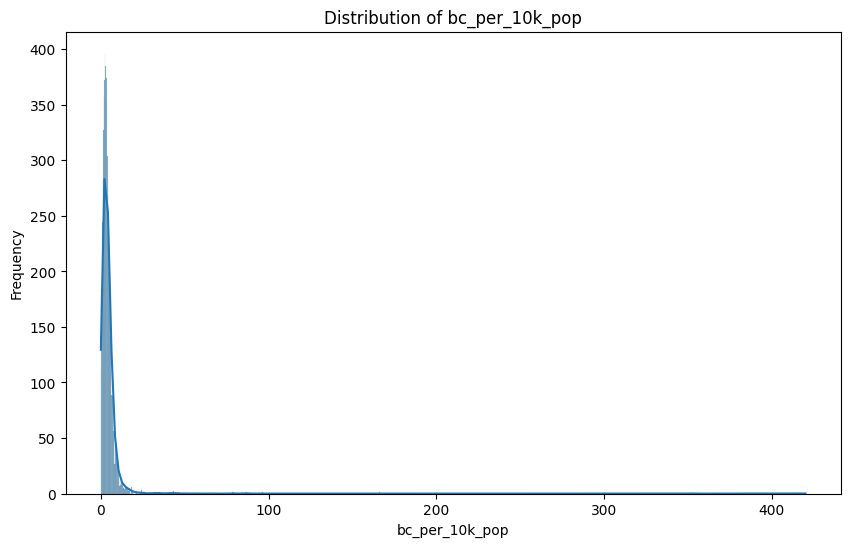

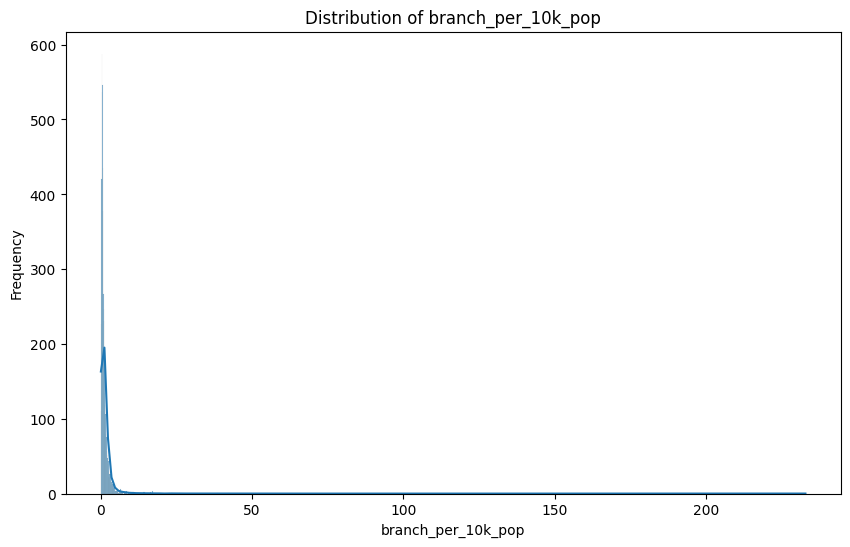

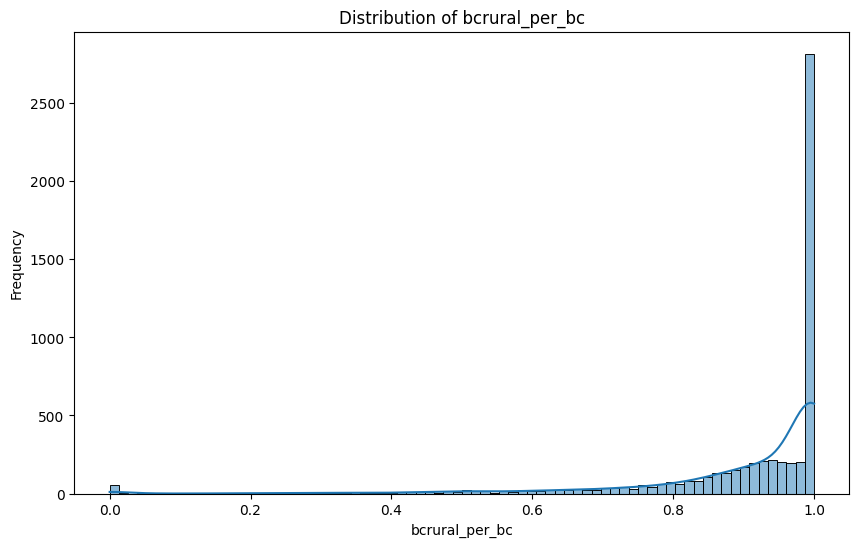

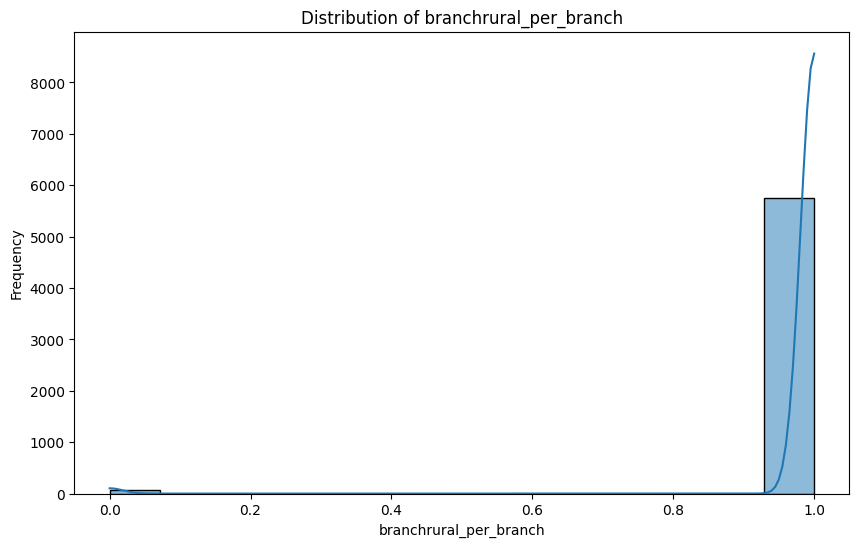

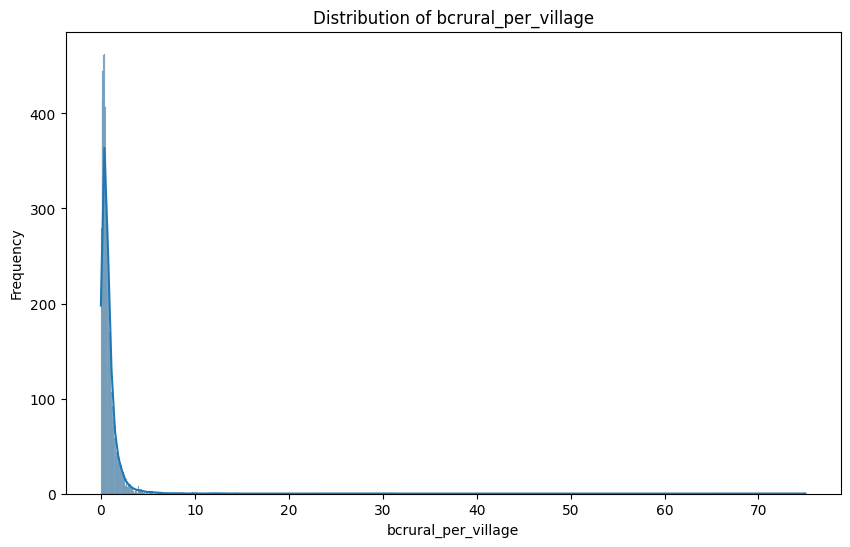

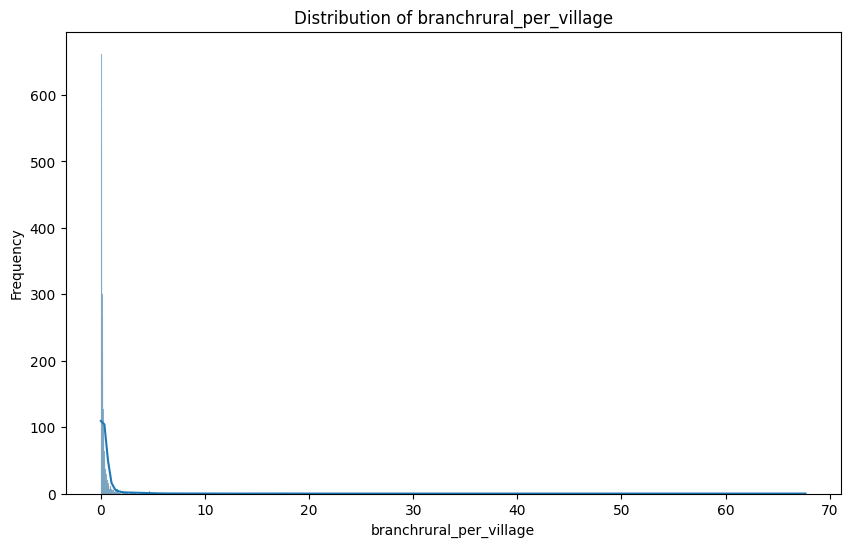

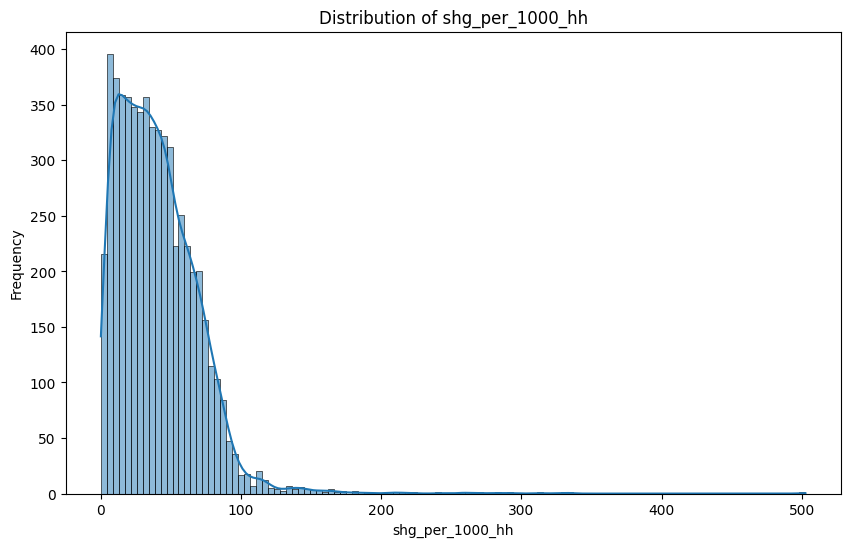

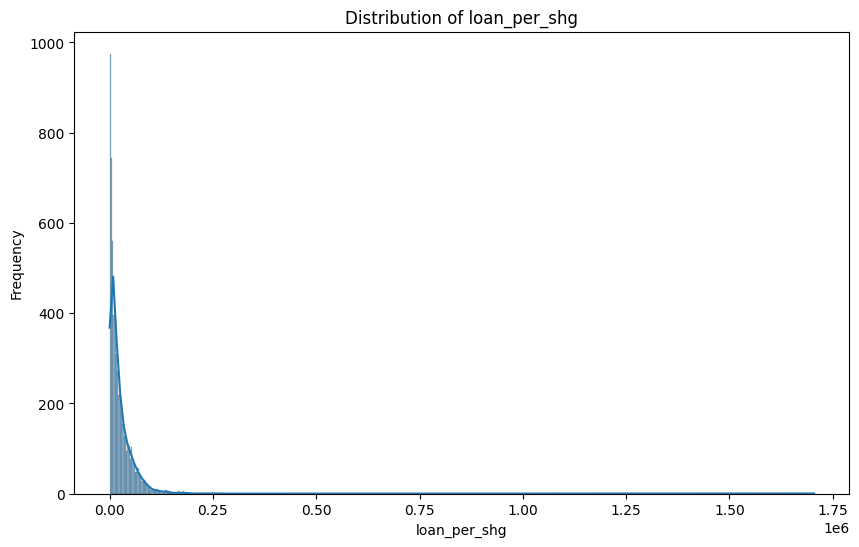

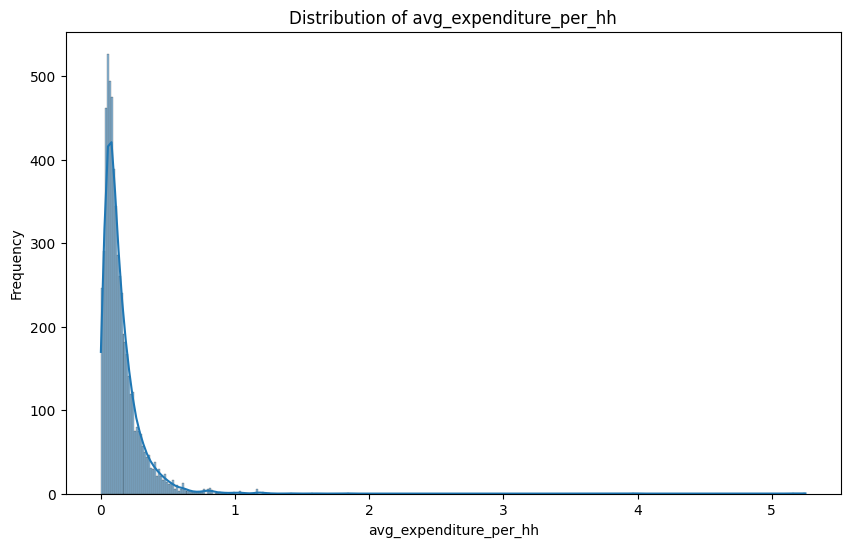

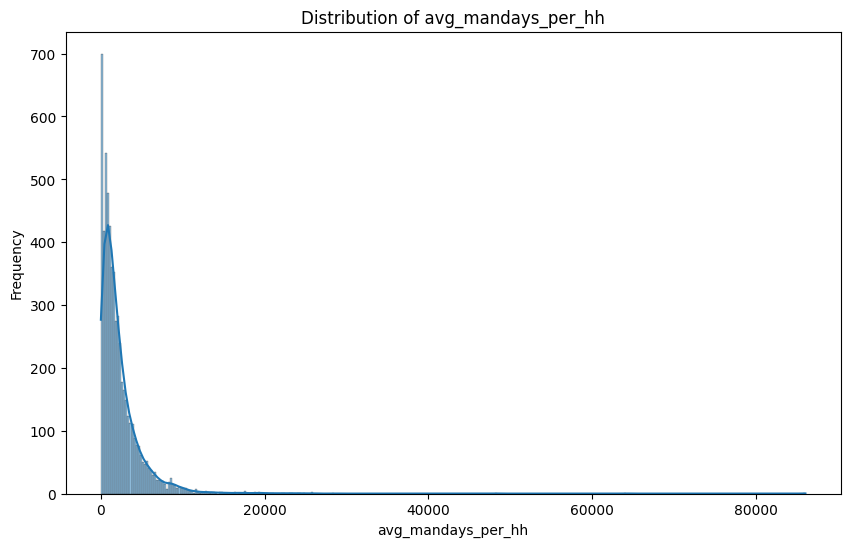

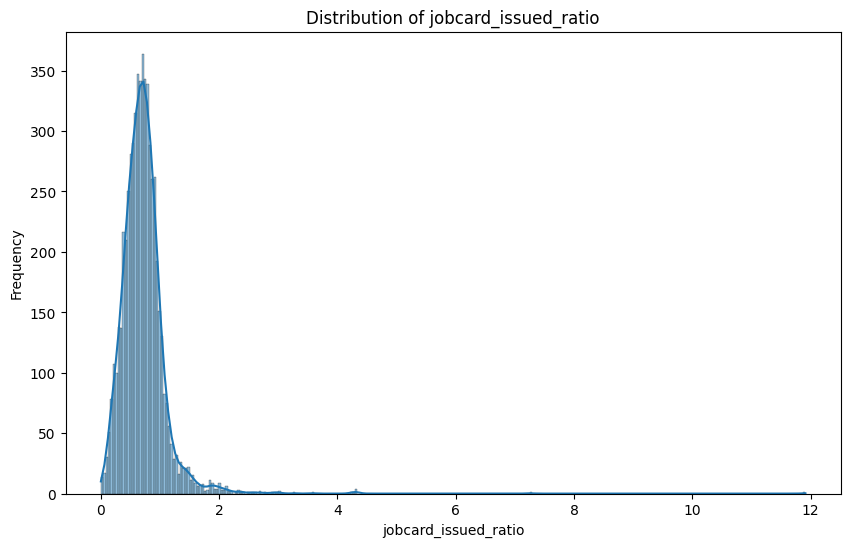

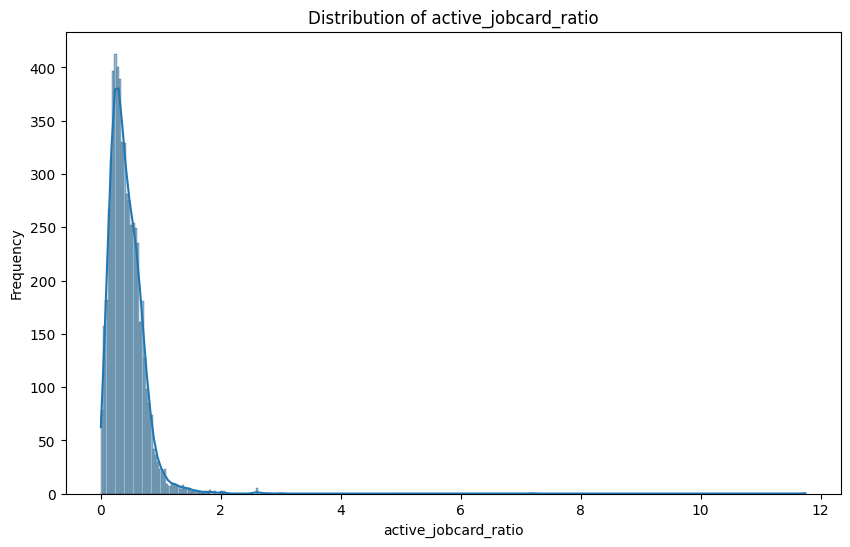

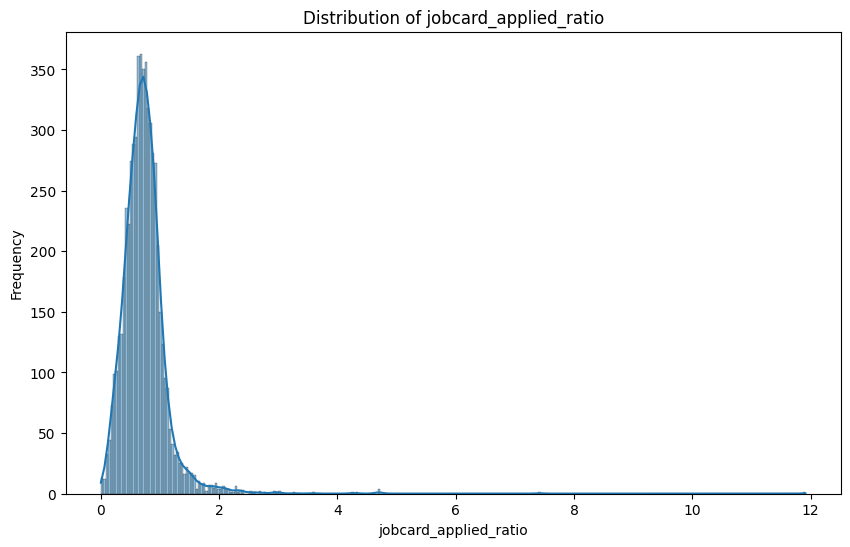

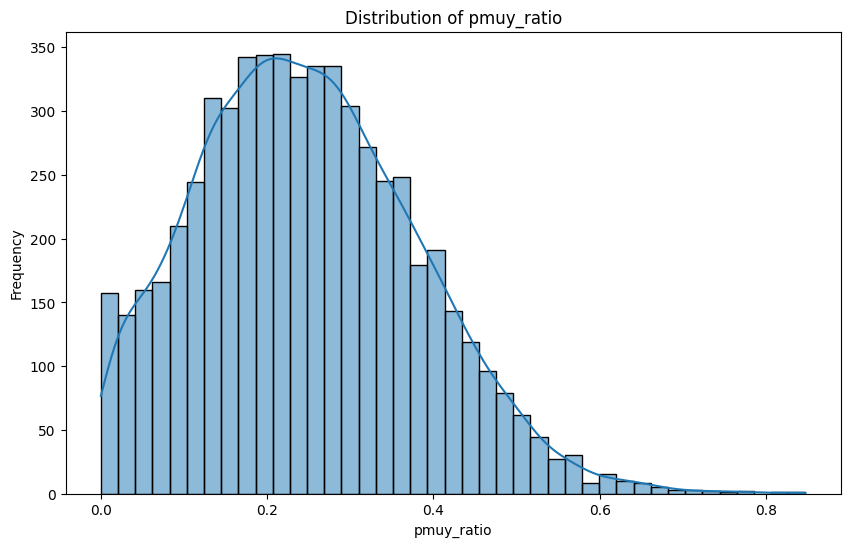

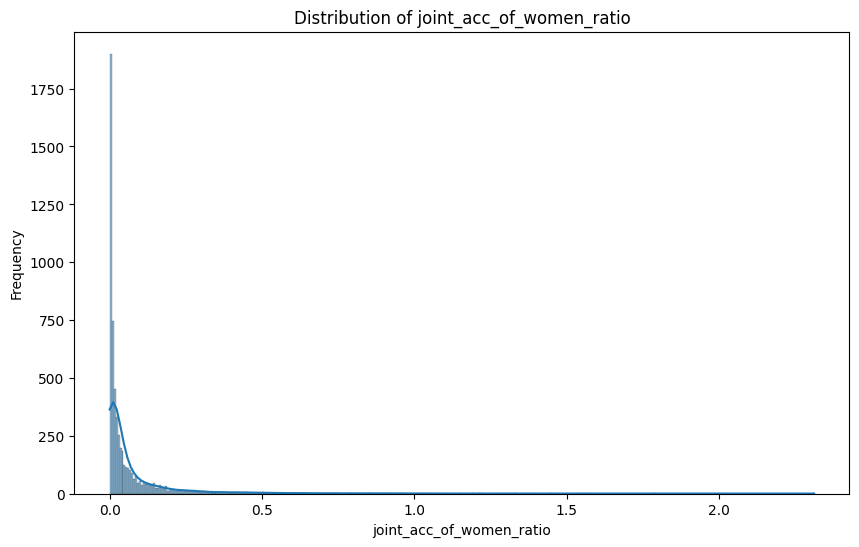

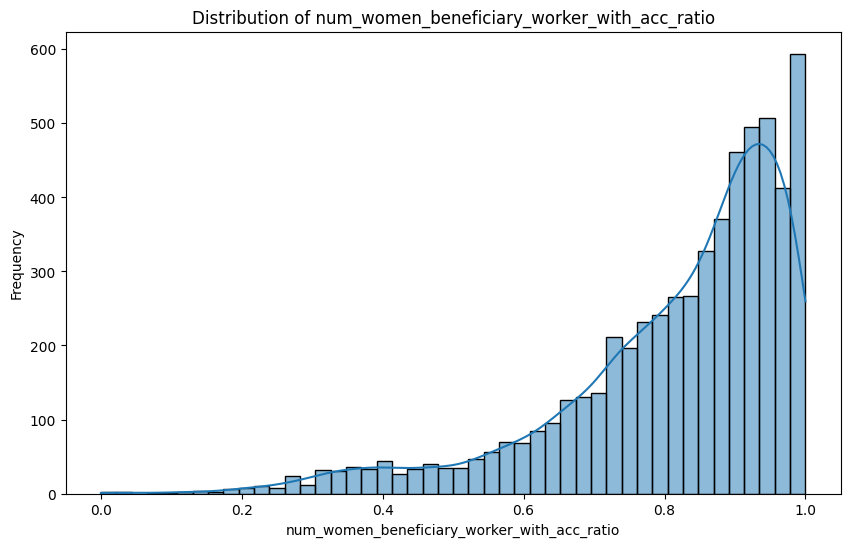

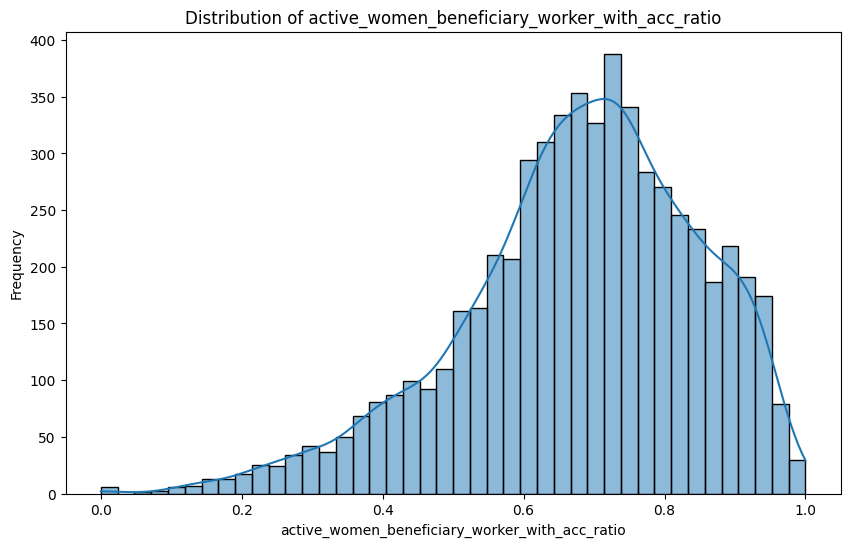

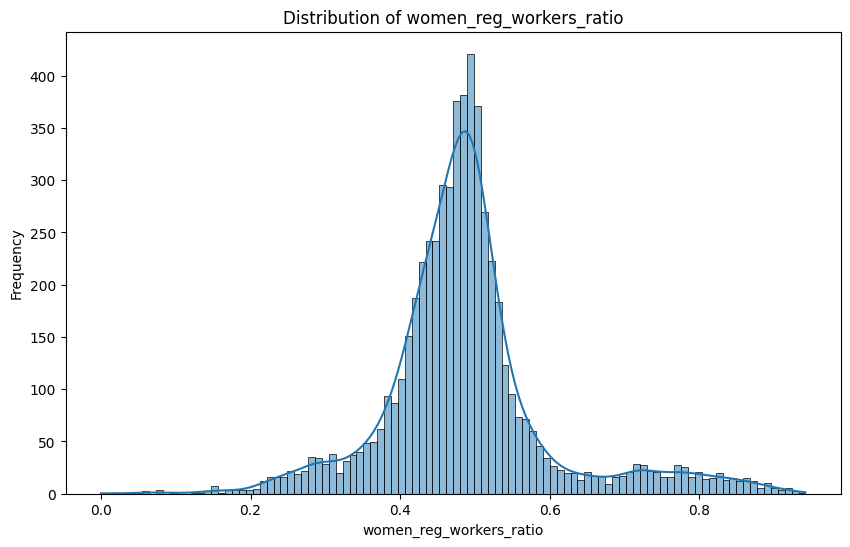

In [4]:
Infrastructure = ['vill_road_coverage', 'road_pop_coverage', 'vill_elec_8_12_ratio', 'vill_elec_mt_12_ratio']
FinancialCoverage = ['bc_per_10k_pop', 'branch_per_10k_pop', 'bcrural_per_bc', 'branchrural_per_branch', 'bcrural_per_village', 'branchrural_per_village', 'shg_per_1000_hh', 'loan_per_shg'] 
Welfare = ['avg_expenditure_per_hh', 'avg_mandays_per_hh', 'jobcard_issued_ratio', 'active_jobcard_ratio', 'jobcard_applied_ratio', 'pmuy_ratio']
SocialInclusion = ['joint_acc_of_women_ratio', 'num_women_beneficiary_worker_with_acc_ratio', 'active_women_beneficiary_worker_with_acc_ratio', 'women_reg_workers_ratio']

all_columns = Infrastructure + FinancialCoverage + Welfare + SocialInclusion

cyclone_df = df[Infrastructure+FinancialCoverage+Welfare+SocialInclusion]

for column in all_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(cyclone_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
standard = ['women_reg_workers_ratio']
robust = [col for col in all_columns if col not in standard]

rscaler = RobustScaler()
scaler = StandardScaler()

df_scaled = cyclone_df.copy()

df_scaled[robust] = rscaler.fit_transform(cyclone_df[robust])
df_scaled[standard] = scaler.fit_transform(cyclone_df[standard])

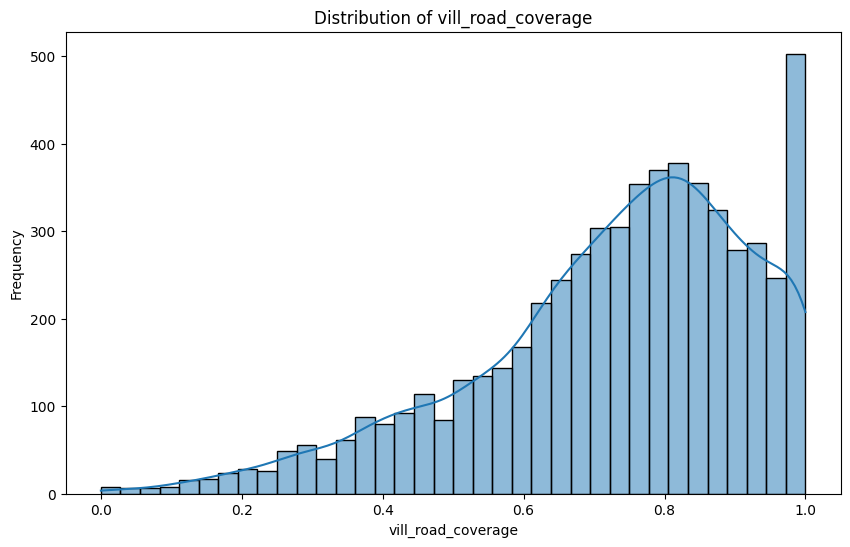

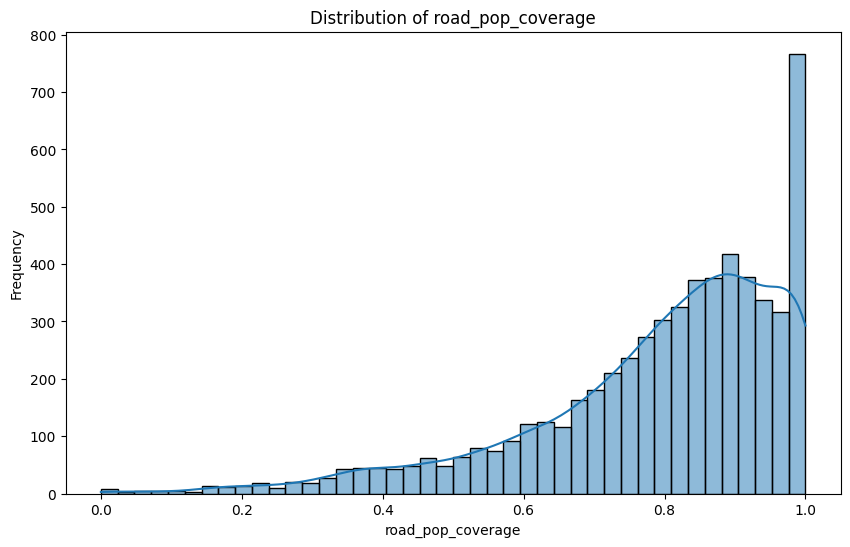

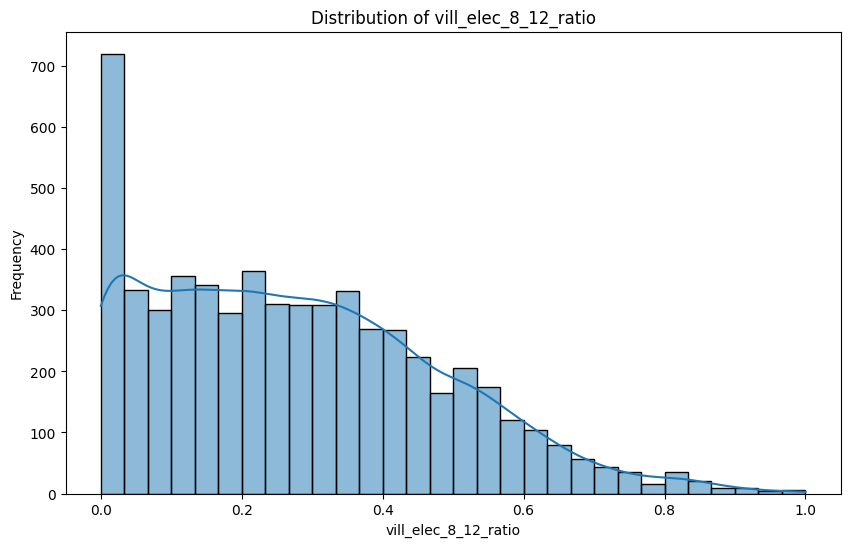

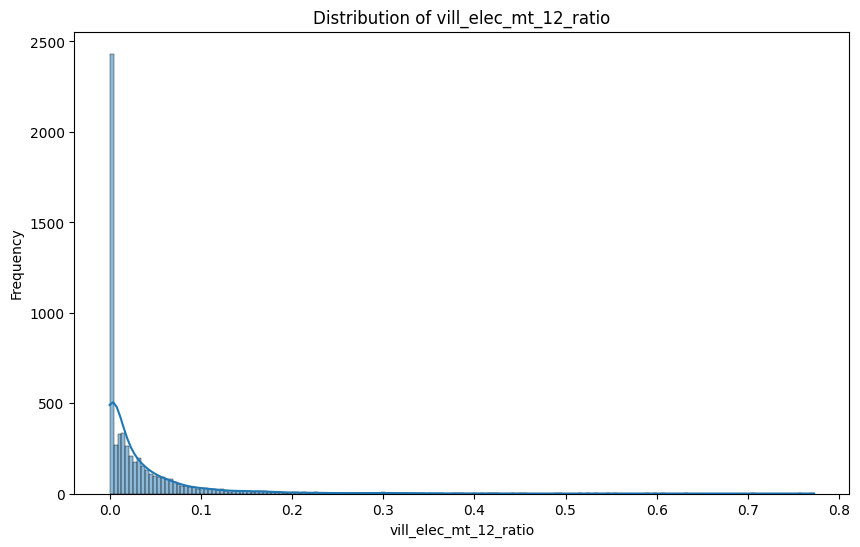

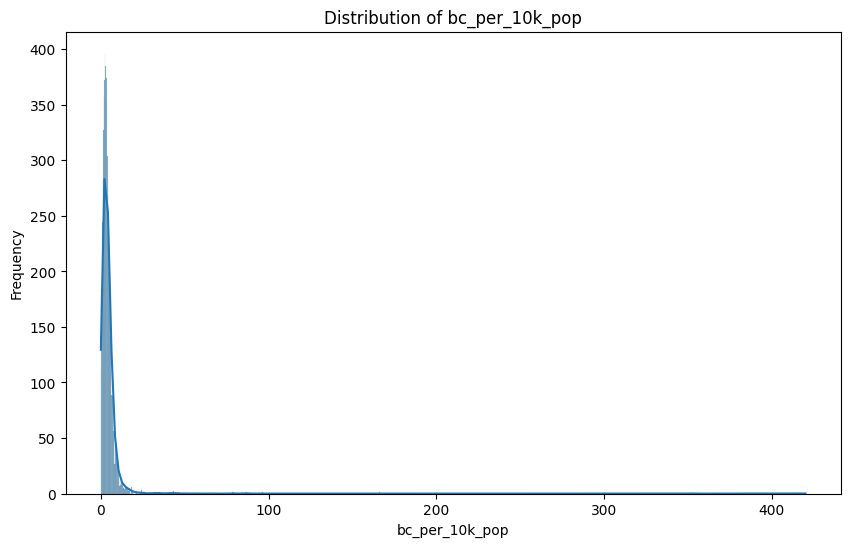

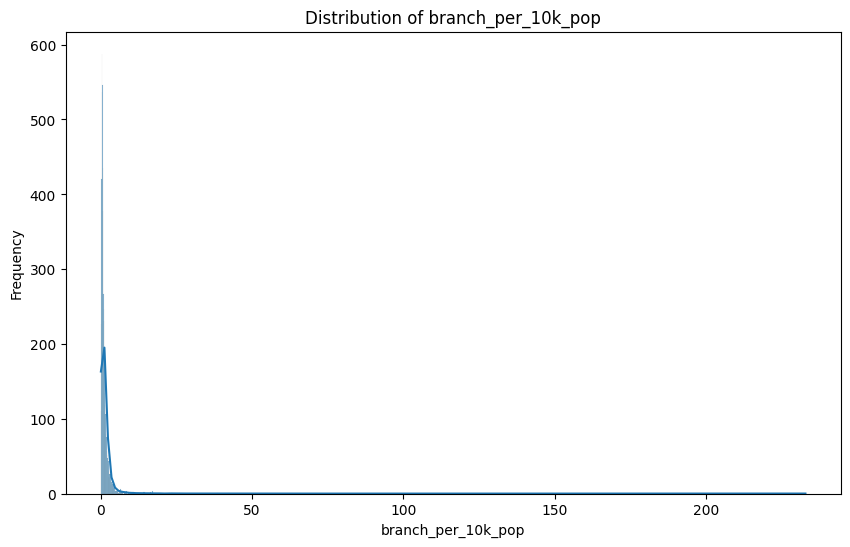

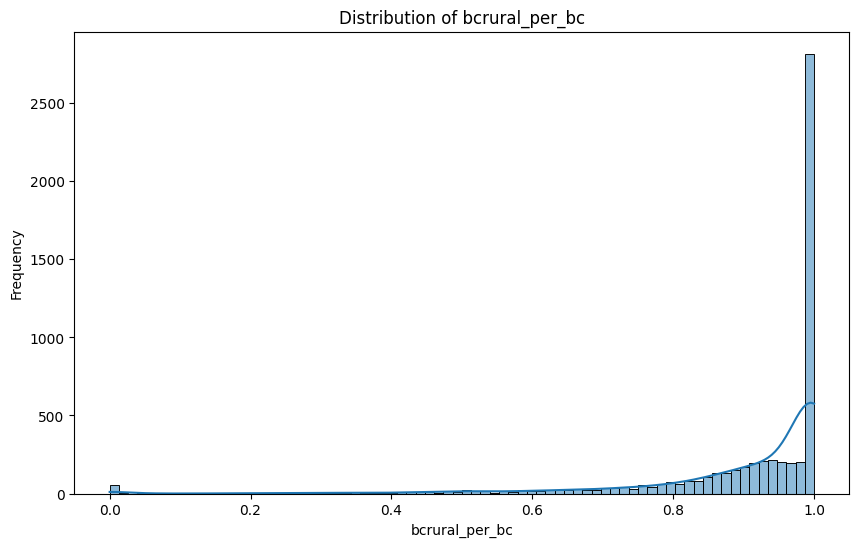

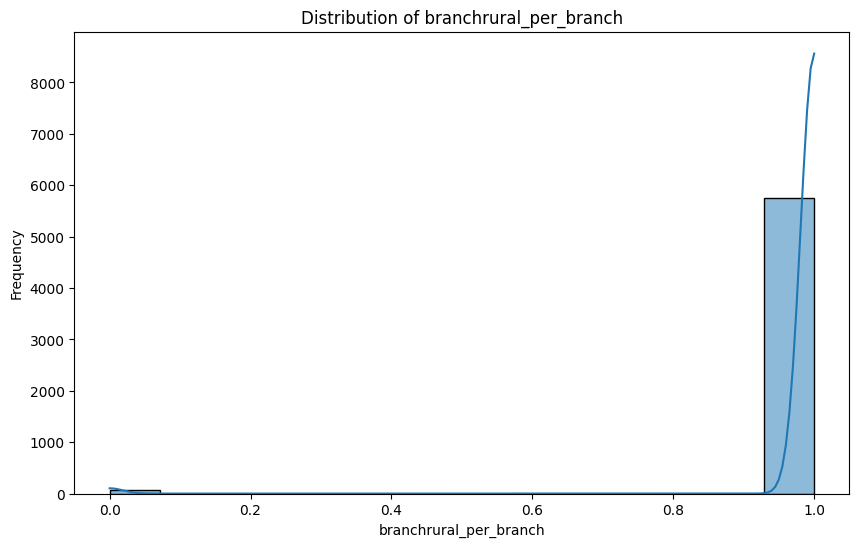

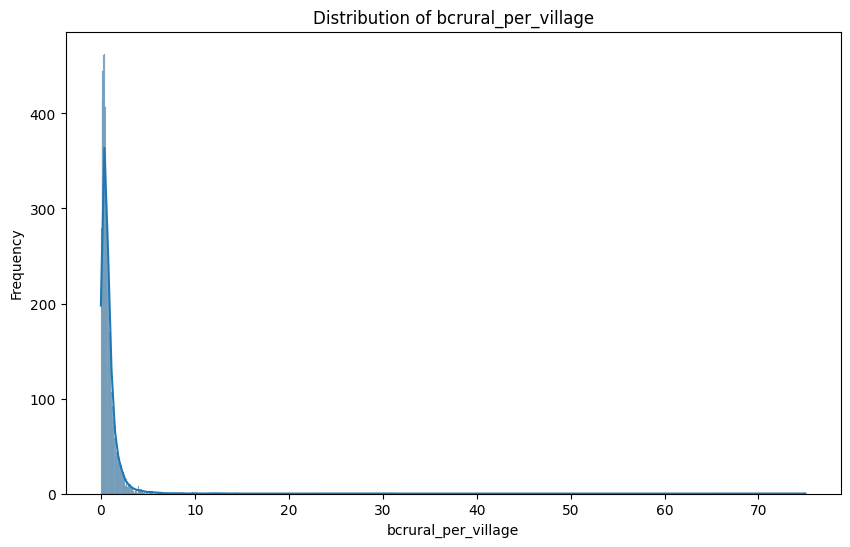

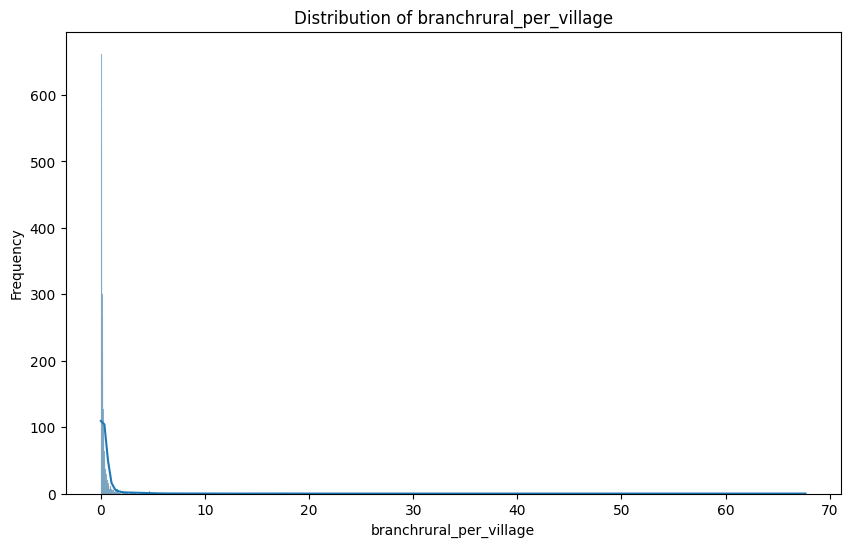

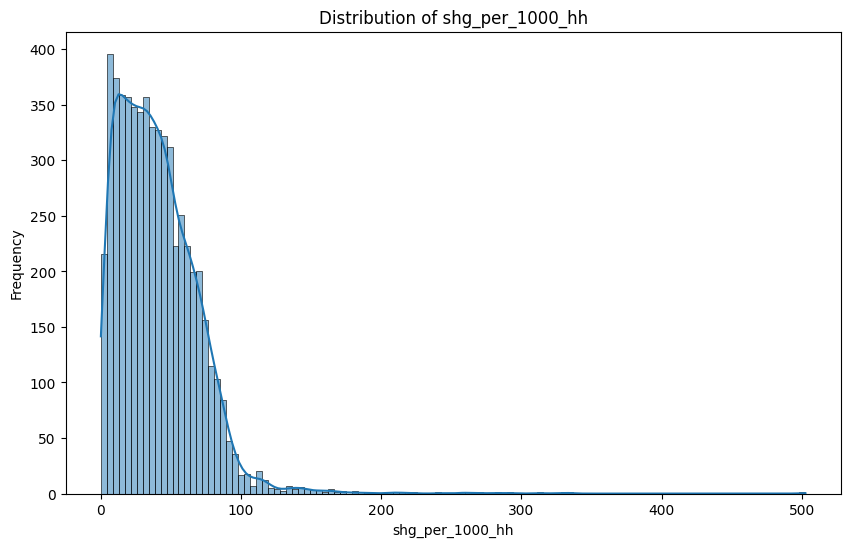

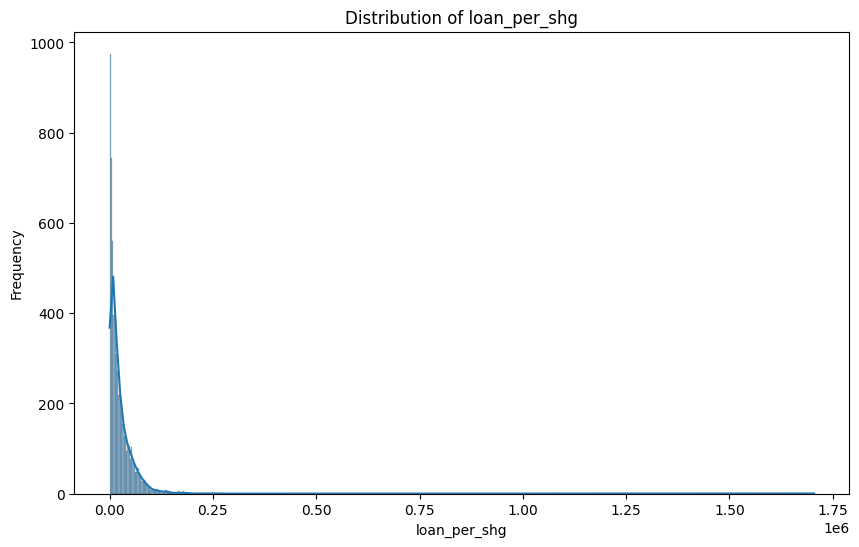

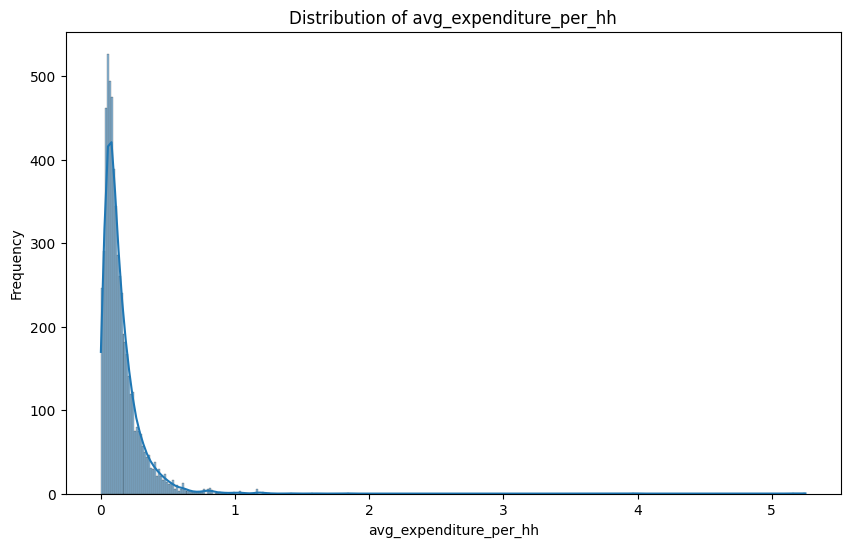

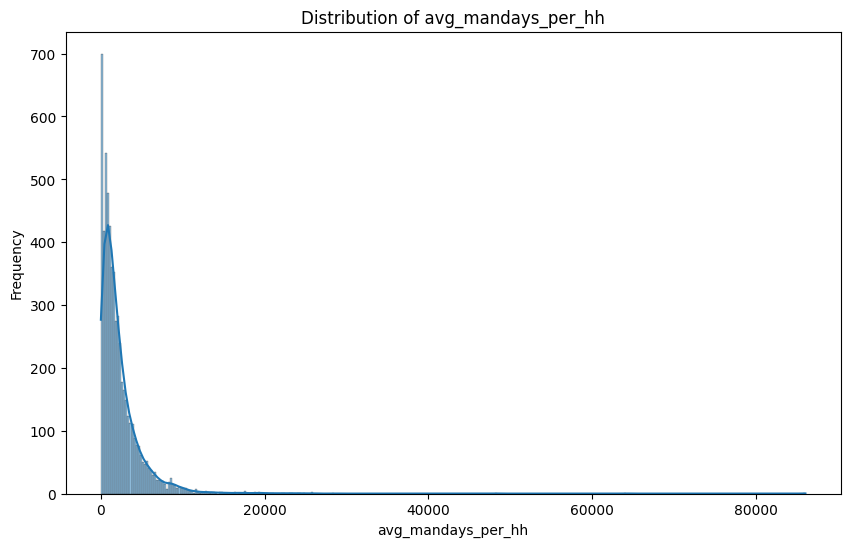

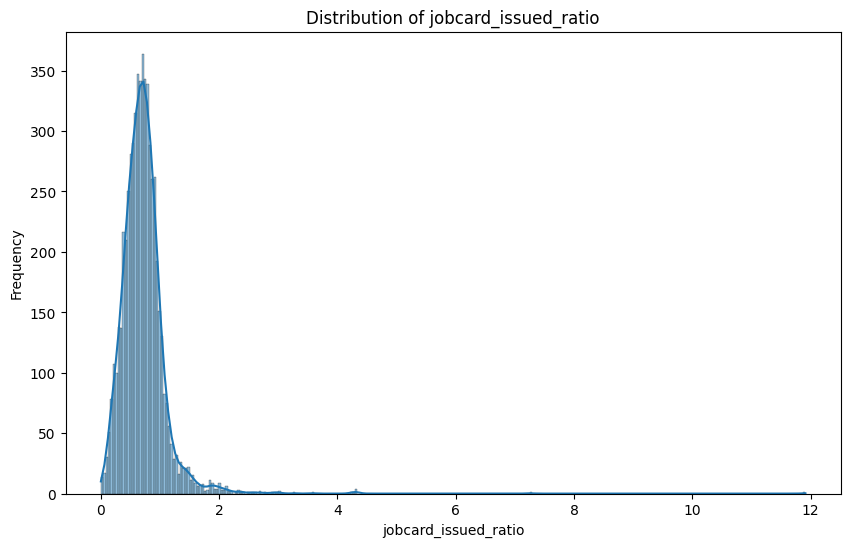

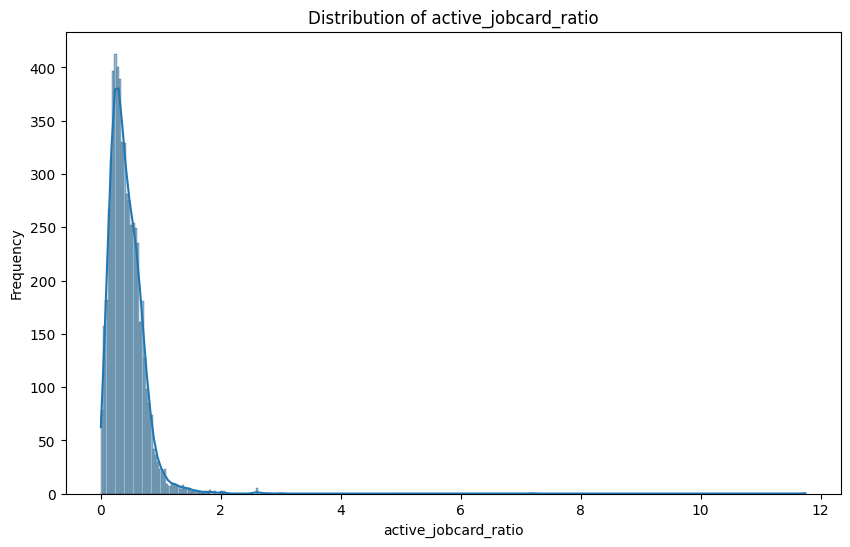

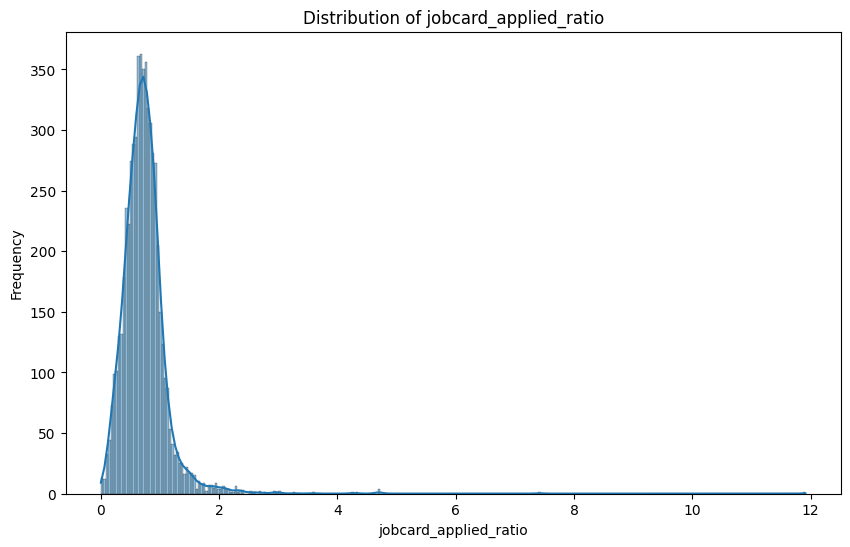

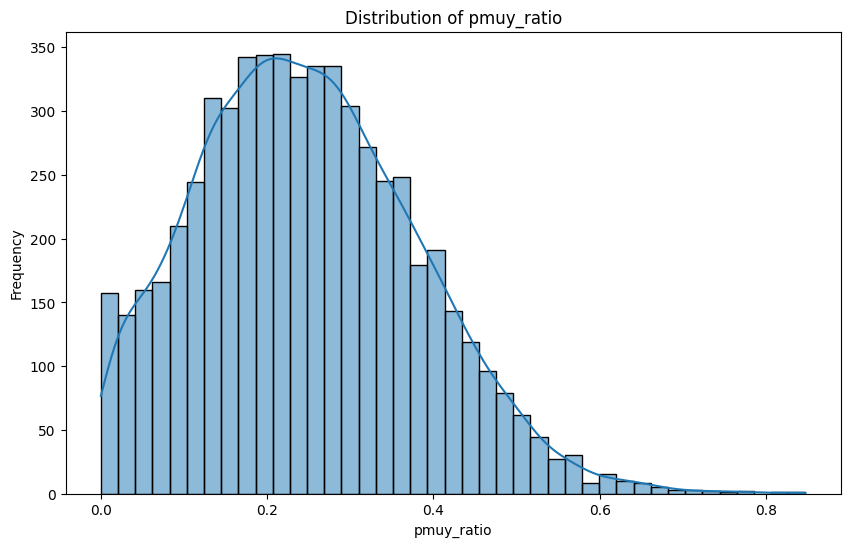

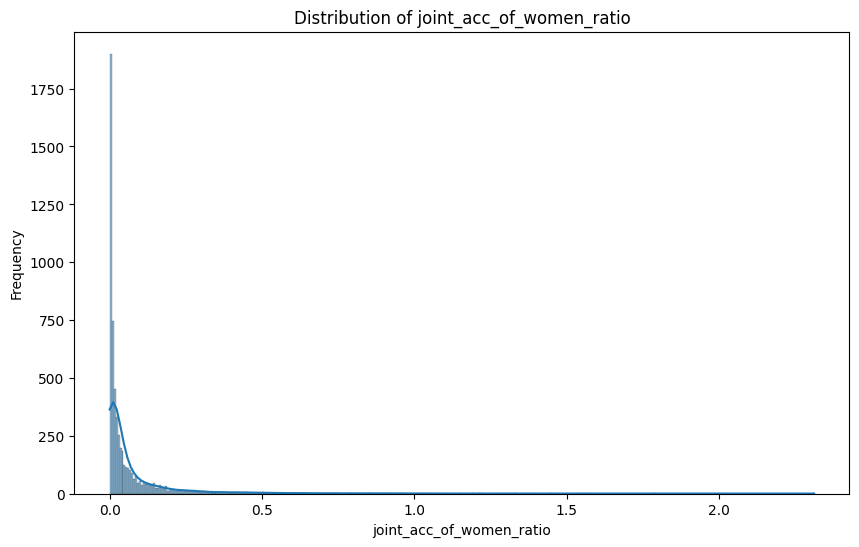

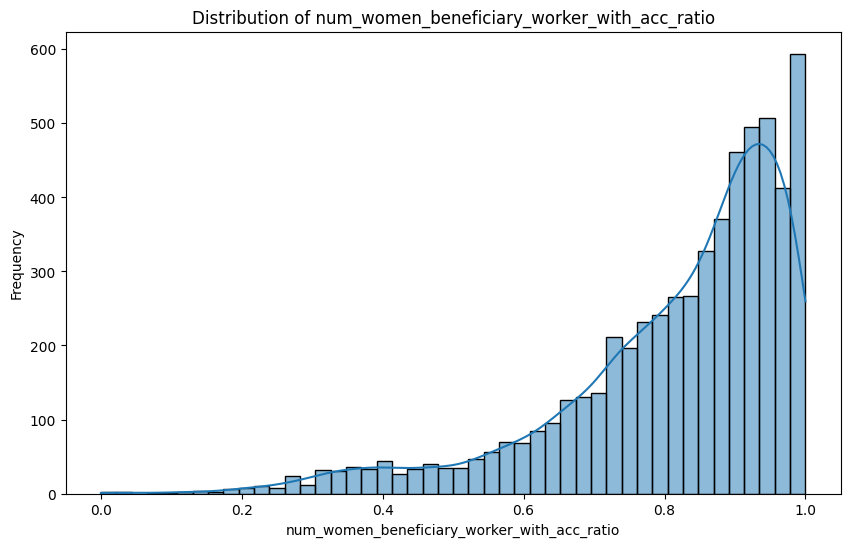

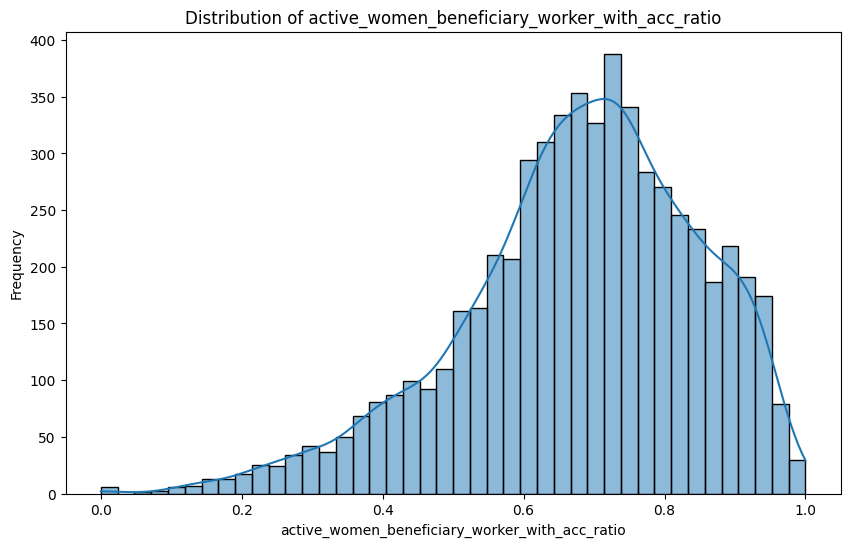

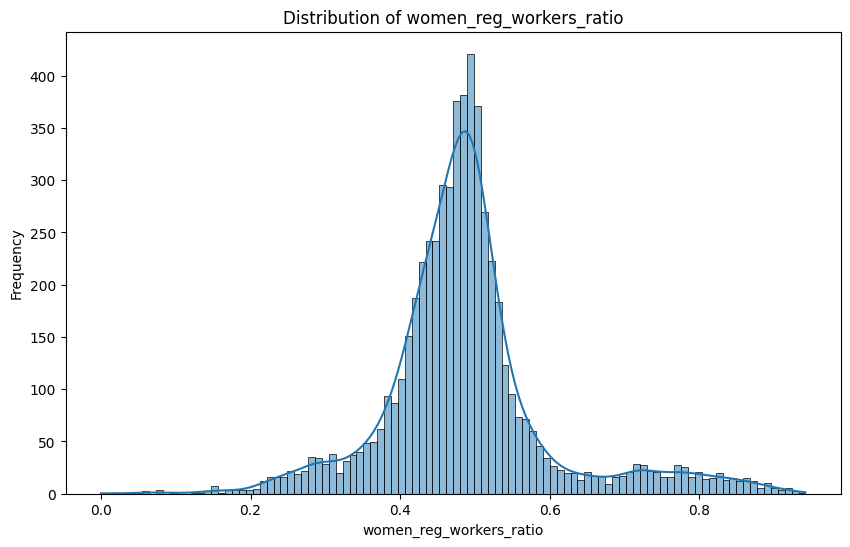

In [6]:
for column in all_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(cyclone_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    

In [7]:
df_scaled.isna().sum()


vill_road_coverage                                0
road_pop_coverage                                 0
vill_elec_8_12_ratio                              0
vill_elec_mt_12_ratio                             0
bc_per_10k_pop                                    0
branch_per_10k_pop                                0
bcrural_per_bc                                    0
branchrural_per_branch                            0
bcrural_per_village                               0
branchrural_per_village                           0
shg_per_1000_hh                                   0
loan_per_shg                                      0
avg_expenditure_per_hh                            0
avg_mandays_per_hh                                0
jobcard_issued_ratio                              0
active_jobcard_ratio                              0
jobcard_applied_ratio                             0
pmuy_ratio                                        0
joint_acc_of_women_ratio                          0
num_women_be

In [8]:
df_pca = df_scaled.copy()
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca)

PCA()

In [9]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)

,% variance,Cumulative %
0,0.746,0.746
1,0.097,0.843
2,0.034,0.877
3,0.027,0.905
4,0.022,0.926
5,0.015,0.941
6,0.011,0.953
7,0.009,0.962
8,0.009,0.971
9,0.006,0.978


In [11]:
PCA_weights = pcaSummary_df['% variance']

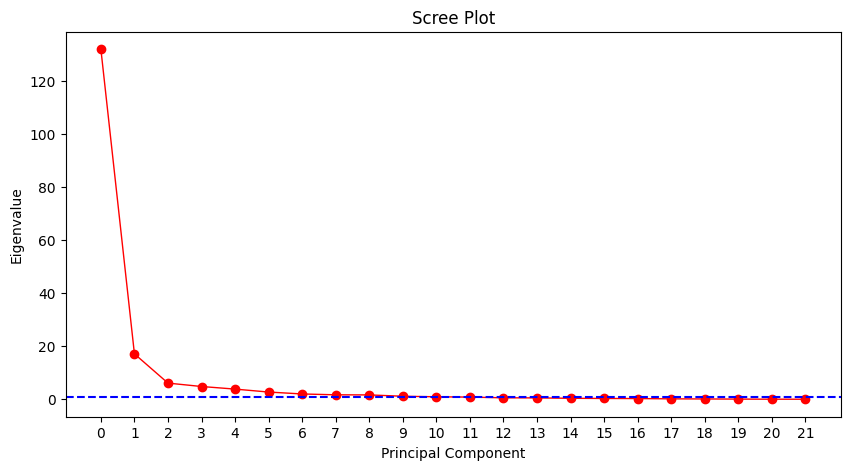

In [12]:

# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [13]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=9)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(9)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                                                     PC1       PC2       PC3  \
vill_road_coverage                              0.010665 -0.014370 -0.060377   
road_pop_coverage                               0.009805 -0.008281 -0.055331   
vill_elec_8_12_ratio                           -0.007266  0.008341 -0.002322   
vill_elec_mt_12_ratio                          -0.008795  0.006670  0.055031   
bc_per_10k_pop                                  0.157701  0.482727 -0.041204   
branch_per_10k_pop                              0.345976  0.763814  0.006335   
bcrural_per_bc                                 -0.029076 -0.046968  0.055740   
branchrural_per_branch                          0.000257  0.000396 -0.002080   
bcrural_per_village                             0.112692  0.148407 -0.139453   
branchrural_per_village                         0.917003 -0.388653  0.042638   
shg_per_1000_hh                                -0.002845  0.000469  0.034174   
loan_per_shg                            

In [14]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Cyclone_AdaptiveCapacity_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   vill_road_coverage  road_pop_coverage  vill_elec_8_12_ratio  \
0            0.927667           0.744099             -0.841282   
1           -1.572508           0.517692             -0.841282   
2            0.664828           0.444422             -0.841282   
3            0.463833           0.384897             -0.452998   
4           -0.732368          -0.900656              0.027248   

   vill_elec_mt_12_ratio  bc_per_10k_pop  branch_per_10k_pop  bcrural_per_bc  \
0              -0.288155        0.041973            1.039097        0.168285   
1              -0.288155       -0.916576            0.007650        0.168285   
2              -0.288155        1.367188            4.644866       -4.569156   
3              -0.288155       -0.338679            0.175965       -0.673141   
4              -0.288155        0.339747            0.215595        0.168285   

   branchrural_per_branch  bcrural_per_village  branchrural_per_village  ...  \
0                     0.0            -0.35

In [15]:
# Multiply each PCA component score by its weight
df["Cyclone_AdaptiveCapacity_Index"] = (
    PCA_weights[0] * df_scaled["Cyclone_AdaptiveCapacity_PC1"] +
    PCA_weights[1] * df_scaled["Cyclone_AdaptiveCapacity_PC2"] +
    PCA_weights[2] * df_scaled["Cyclone_AdaptiveCapacity_PC3"] +
    PCA_weights[3] * df_scaled["Cyclone_AdaptiveCapacity_PC4"] +
    PCA_weights[4] * df_scaled["Cyclone_AdaptiveCapacity_PC5"] +
    PCA_weights[5] * df_scaled["Cyclone_AdaptiveCapacity_PC6"] +
    PCA_weights[6] * df_scaled["Cyclone_AdaptiveCapacity_PC7"] +
    PCA_weights[7] * df_scaled["Cyclone_AdaptiveCapacity_PC8"] 
)

# Display the flood_exposure Index
print(df[["block_code", "Cyclone_AdaptiveCapacity_Index"]].head())

   block_code  Cyclone_AdaptiveCapacity_Index
0        6498                       -1.040349
1        6492                       -1.969131
2        4689                        9.103607
3        4690                       -1.095225
4        4692                       -0.754448
